In [ ]:
##############################################################################################
import keras
keras.backend.clear_session()

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import scipy.io

# Specify the folder path containing the MAT files
ad_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/MCI_features_P_agematched.mat"
he_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/HC_features_P_agematched.mat"

# Load data from AD and HE folders
ad_data = scipy.io.loadmat(ad_folder)['MCI_features_P_agematched']
he_data = scipy.io.loadmat(he_folder)['HC_features_P_agematched']

np.random.shuffle(ad_data)
np.random.shuffle(he_data)


characters=['Variance','Skewness','Kurtosis','Shape Factor','Peak Amp','Impulse factor','Crest factor','clearance factor','Willison Amp','ZCR','Sample Entropy','Approx. Entropy',
           'permutation entropy','state space corr ent','corr dim','Higuchi Fractal dimension','Katz Fractal dim','Lyapunov Exp','Hurst Exponent',
           'Lempel-Ziv Complexity','Hjorth Activity','Hjorth Mobility','Hjorth Complexity','alpha dominant freq','gamma dominant freq','Spectral Roll Off',
           'Spectral Centroid','Spectral Spread','Spectral Flux','Spectral Skewness','Spectral Kurtosis','Theta Beta Ratio','Theta Alpha Ratio',
           'Gamma alpha ratio','Spectral Power Ratio','Wavelet Energy Approx','Wavelet Energy Detail','Relative Wavelet Energy','Wavelet Packet Energy Approx',
            'Wavelet Packet Energy Detail','Relative Wavelet Packet Energy']
print(len(characters))

# new_ind = list(range(23)) + list(range(25,43)) # Removing 'Dominant Frequency' and 'Median Frequency' features
# print(new_ind)
# characters_subset=[characters[i] for i in new_ind]
# print(characters_subset)
# print(len(characters_subset))

ad_train_test = ad_data[0:900, :]
he_train_test = he_data[0:900, :]

ad_unseen = ad_data[900::, :]
he_unseen = he_data[900::, :]

# Combine and label the data
X = np.vstack((ad_train_test, he_train_test))
y = np.hstack([np.zeros(len(ad_train_test)), np.ones(len(he_train_test))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)             




# Set the number of runs
num_runs = 20

# Lists to store the models and test accuracies
models = []
test_accuracies = []
histories = []

for run in range(num_runs):
    print(f"Training Run {run + 1}/{num_runs}")

    # Clear previous session
    keras.backend.clear_session()

    # Define the neural network model
    model = Sequential()
    model.add(Dense(36, activation='relu', input_shape=(41,)))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(18, activation='relu'))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True),
                                   ModelCheckpoint(f'best6_model_{run}.h5', save_best_only=True)])

    # Save the model and append to the list
    models.append(model)
    histories.append(history)    

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    test_accuracies.append(test_acc)

# Calculate and print the average test accuracy
average_test_accuracy = np.mean(test_accuracies)
print(f'Average Test Accuracy: {average_test_accuracy}')

2024-01-24 14:41:55.019001: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


41
Training Run 1/20


/gpfs/data/user/devanand/.conda/envs/test-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2024-01-24 14:42:38.909828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-24 14:42:42.075015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14638 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:62:00.0, compute capability: 7.0
2024-01-24 14:42:42.089534: I tensorflow/core/common_runtime/gpu/gpu_devic

Epoch 1/1000
85/85 [==============================] - 2s 11ms/step - loss: 4.2301 - accuracy: 0.5311 - val_loss: 0.9165 - val_accuracy: 0.5800
Epoch 2/1000
85/85 [==============================] - 0s 5ms/step - loss: 0.9224 - accuracy: 0.5637 - val_loss: 0.8152 - val_accuracy: 0.5778
Epoch 3/1000
85/85 [==============================] - 0s 4ms/step - loss: 0.8707 - accuracy: 0.5193 - val_loss: 0.7752 - val_accuracy: 0.5444
Epoch 4/1000
85/85 [==============================] - 0s 5ms/step - loss: 0.8587 - accuracy: 0.5356 - val_loss: 0.7540 - val_accuracy: 0.5800
Epoch 5/1000
85/85 [==============================] - 0s 4ms/step - loss: 0.7879 - accuracy: 0.5474 - val_loss: 0.7790 - val_accuracy: 0.5178
Epoch 6/1000
85/85 [==============================] - 0s 3ms/step - loss: 0.7930 - accuracy: 0.5385 - val_loss: 0.9139 - val_accuracy: 0.5200
Epoch 7/1000
85/85 [==============================] - 0s 4ms/step - loss: 0.7314 - accuracy: 0.5585 - val_loss: 0.7267 - val_accuracy: 0.5422
Epoch

In [4]:
import tensorflow as tf

model_names = [f'seq{run + 1}' for run in range(num_runs)]

models = [models[i] for i in range(num_runs)] 

for run in range(num_runs):
    models[run]._name = f'seq{run + 1}'


model_input = tf.keras.Input(shape=(41,))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [5]:
# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the ensemble model on the test set
ensemble_test_loss, ensemble_test_acc = ensemble_model.evaluate(X_test, y_test)
print(f'Ensemble Test Accuracy: {ensemble_test_acc}')


15/15 [==============================] - 2s 8ms/step - loss: 0.4940 - accuracy: 0.7489
Ensemble Test Accuracy: 0.7488889098167419


In [6]:
for n in range(0,20):
    models[n].compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Evaluate the ensemble model on the test set
    t_loss, t_acc = models[n].evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7289


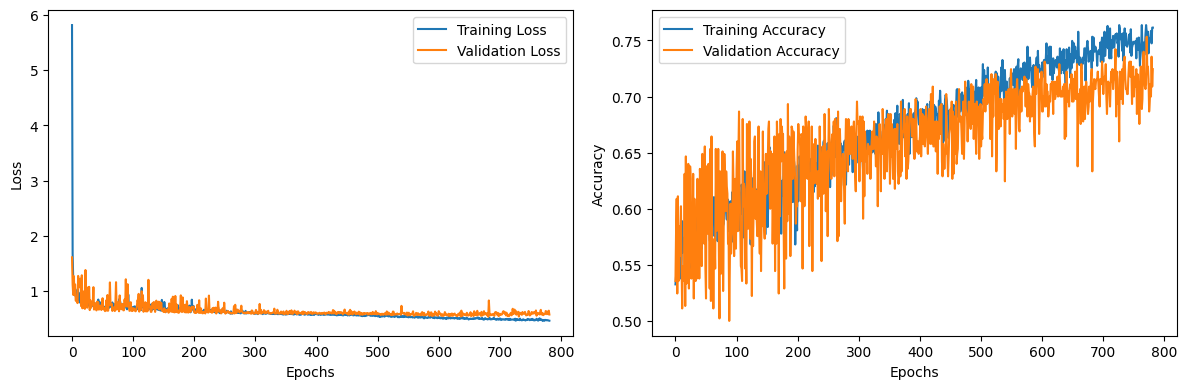

Model: "seq17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                1512      
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 2)                 38        
                                                                 
Total params: 2,216
Trainable params: 2,216
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 41)]         0           []                               
         

In [7]:
import matplotlib.pyplot as plt
i=16
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(histories[i].history['loss'], label='Training Loss')
plt.plot(histories[i].history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(histories[i].history['accuracy'], label='Training Accuracy')
plt.plot(histories[i].history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

models[i].summary()
ensemble_model.summary()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
PermutationExplainer explainer: 1801it [06:12,  4.78it/s]                          


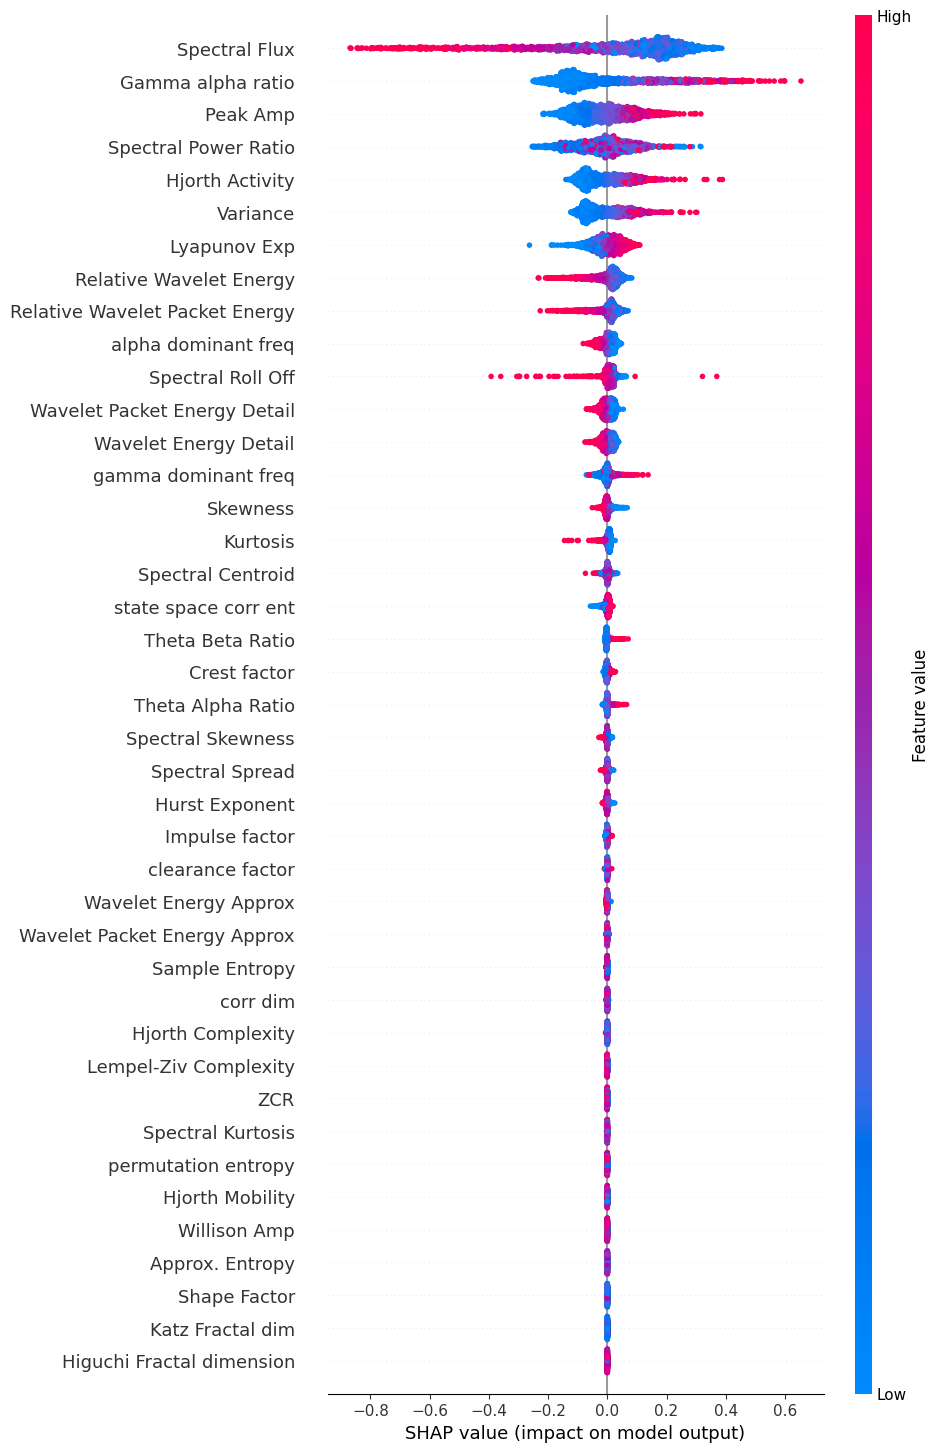

In [8]:
import shap
explainer = shap.Explainer(ensemble_model, X,feature_names=characters)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values[:,:,0], max_display=41)

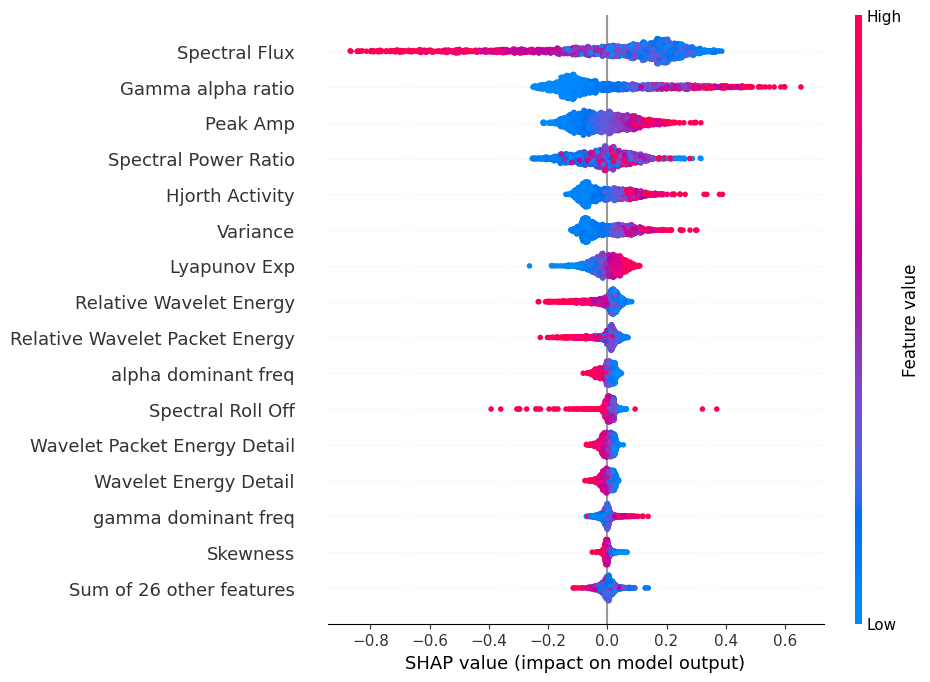

In [9]:
shap.plots.beeswarm(shap_values[:,:,0], max_display=16)

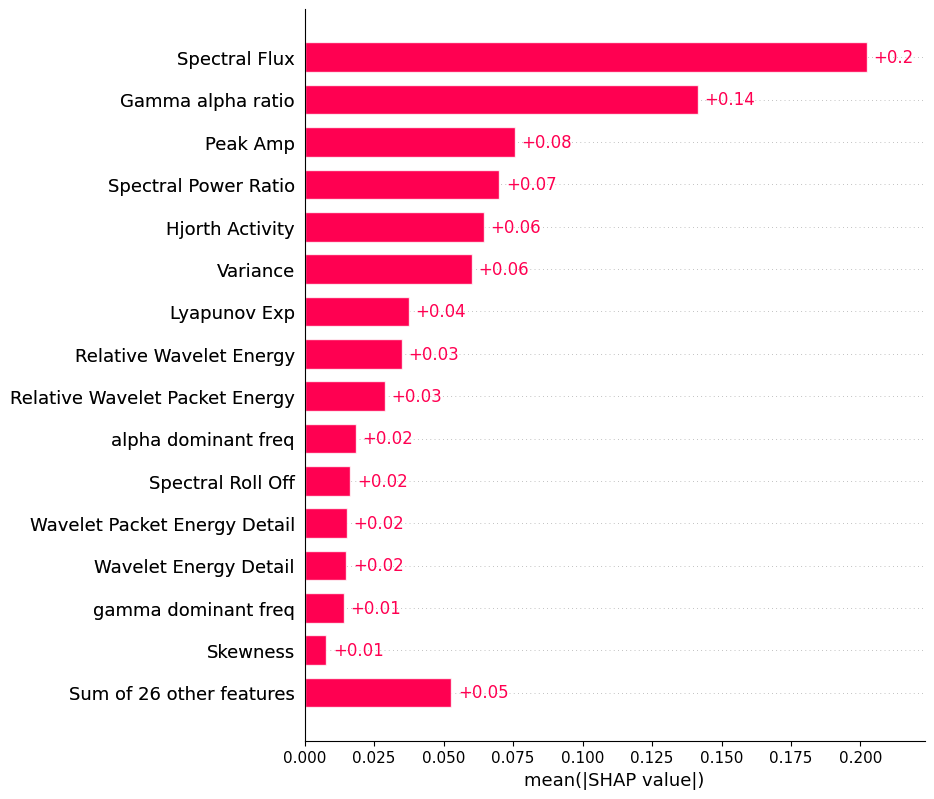

In [10]:
shap.plots.bar(shap_values[:,:,0].abs.mean(0), max_display=16)

In [ ]:
list_Hampel=['Spectral Flux','Gamma Alpha Ratio','Peak Amplitude','Spectral Power Ratio', 'Hjorth Activity','Variance', 'Lyapunov Exponent', 
          'Relative Wavelet Energy', 'Relative Wavelet Packet Energy','Alpha Dominant Frequency','Spectral Roll off','Wavelet Packet Energy Detail',
             'Wavelet Energy Detail','Gamma Dominant Frequency','Skewness']

In [17]:
##############################################################################################
import keras
keras.backend.clear_session()

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import scipy.io

# Specify the folder path containing the MAT files
ad_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/MCI_features_ASR_agematched.mat"
he_folder = "/gpfs/data/user/devanand/scripts/NN/agematched/HC_features_ASR_agematched.mat"

# Load data from AD and HE folders
ad_data = scipy.io.loadmat(ad_folder)['MCI_features_ASR_agematched']
he_data = scipy.io.loadmat(he_folder)['HC_features_ASR_agematched']

np.random.shuffle(ad_data)
np.random.shuffle(he_data)


characters=['Variance','Skewness','Kurtosis','Shape Factor','Peak Amp','Impulse factor','Crest factor','clearance factor','Willison Amp','ZCR','Sample Entropy','Approx. Entropy',
           'permutation entropy','state space corr ent','corr dim','Higuchi Fractal dimension','Katz Fractal dim','Lyapunov Exp','Hurst Exponent',
           'Lempel-Ziv Complexity','Hjorth Activity','Hjorth Mobility','Hjorth Complexity','alpha dominant freq','gamma dominant freq','Spectral Roll Off',
           'Spectral Centroid','Spectral Spread','Spectral Flux','Spectral Skewness','Spectral Kurtosis','Theta Beta Ratio','Theta Alpha Ratio',
           'Gamma alpha ratio','Spectral Power Ratio','Wavelet Energy Approx','Wavelet Energy Detail','Relative Wavelet Energy','Wavelet Packet Energy Approx',
            'Wavelet Packet Energy Detail','Relative Wavelet Packet Energy']
print(len(characters))

# new_ind = list(range(23)) + list(range(25,43)) # Removing 'Dominant Frequency' and 'Median Frequency' features
# print(new_ind)
# characters_subset=[characters[i] for i in new_ind]
# print(characters_subset)
# print(len(characters_subset))

ad_train_test = ad_data[0:900, :]
he_train_test = he_data[0:900, :]

ad_unseen = ad_data[900::, :]
he_unseen = he_data[900::, :]

# Combine and label the data
X = np.vstack((ad_train_test, he_train_test))
y = np.hstack([np.zeros(len(ad_train_test)), np.ones(len(he_train_test))])

# Perform one-hot encoding on labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)             




# Set the number of runs
num_runs = 20

# Lists to store the models and test accuracies
models = []
test_accuracies = []
histories = []

for run in range(num_runs):
    print(f"Training Run {run + 1}/{num_runs}")

    # Clear previous session
    keras.backend.clear_session()

    # Define the neural network model
    model = Sequential()
    model.add(Dense(36, activation='relu', input_shape=(41,)))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(18, activation='relu'))
    # model.add(Dropout(0.05))  # Add dropout here
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True),
                                   ModelCheckpoint(f'agematchedASR_model_{run}.h5', save_best_only=True)])

    # Save the model and append to the list
    models.append(model)
    histories.append(history)    

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    test_accuracies.append(test_acc)

# Calculate and print the average test accuracy
average_test_accuracy = np.mean(test_accuracies)
print(f'Average Test Accuracy: {average_test_accuracy}')

41
Training Run 1/20
Epoch 1/1000


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


85/85 [==============================] - 1s 11ms/step - loss: 10.6426 - accuracy: 0.5319 - val_loss: 1.6158 - val_accuracy: 0.5444
Epoch 2/1000
85/85 [==============================] - 0s 3ms/step - loss: 1.1249 - accuracy: 0.5659 - val_loss: 1.2864 - val_accuracy: 0.5956
Epoch 3/1000
85/85 [==============================] - 0s 4ms/step - loss: 1.1353 - accuracy: 0.5770 - val_loss: 1.3469 - val_accuracy: 0.5756
Epoch 4/1000
85/85 [==============================] - 0s 4ms/step - loss: 1.0210 - accuracy: 0.5726 - val_loss: 1.0474 - val_accuracy: 0.6067
Epoch 5/1000
85/85 [==============================] - 0s 3ms/step - loss: 0.9076 - accuracy: 0.6067 - val_loss: 1.1407 - val_accuracy: 0.5200
Epoch 6/1000
85/85 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.5844 - val_loss: 1.0494 - val_accuracy: 0.5711
Epoch 7/1000
85/85 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.5726 - val_loss: 1.2030 - val_accuracy: 0.5178
Epoch 8/1000
85/8

In [19]:
import tensorflow as tf

model_names = [f'seq{run + 1}' for run in range(num_runs)]

models = [models[i] for i in range(num_runs)] 

for run in range(num_runs):
    models[run]._name = f'seq{run + 1}'


model_input = tf.keras.Input(shape=(41,))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [20]:
# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the ensemble model on the test set
ensemble_test_loss, ensemble_test_acc = ensemble_model.evaluate(X_test, y_test)
print(f'Ensemble Test Accuracy: {ensemble_test_acc}')


15/15 [==============================] - 1s 6ms/step - loss: 0.3553 - accuracy: 0.8200
Ensemble Test Accuracy: 0.8199999928474426


In [21]:
for n in range(0,20):
    models[n].compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Evaluate the ensemble model on the test set
    t_loss, t_acc = models[n].evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8400


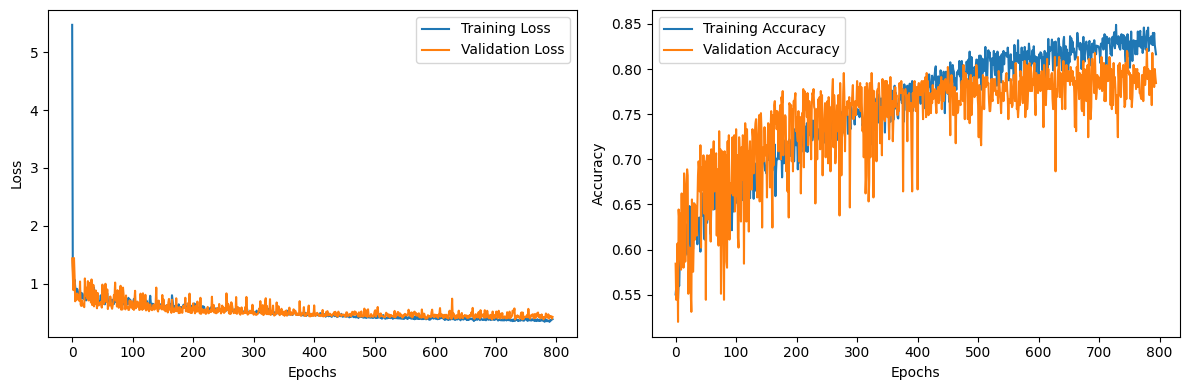

Model: "seq17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                1512      
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 2)                 38        
                                                                 
Total params: 2,216
Trainable params: 2,216
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 41)]         0           []                               
         

In [26]:
import matplotlib.pyplot as plt
i=16
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(histories[i].history['loss'], label='Training Loss')
plt.plot(histories[i].history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(histories[i].history['accuracy'], label='Training Accuracy')
plt.plot(histories[i].history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

models[i].summary()
ensemble_model.summary()

PermutationExplainer explainer: 1801it [05:44,  5.09it/s]                          


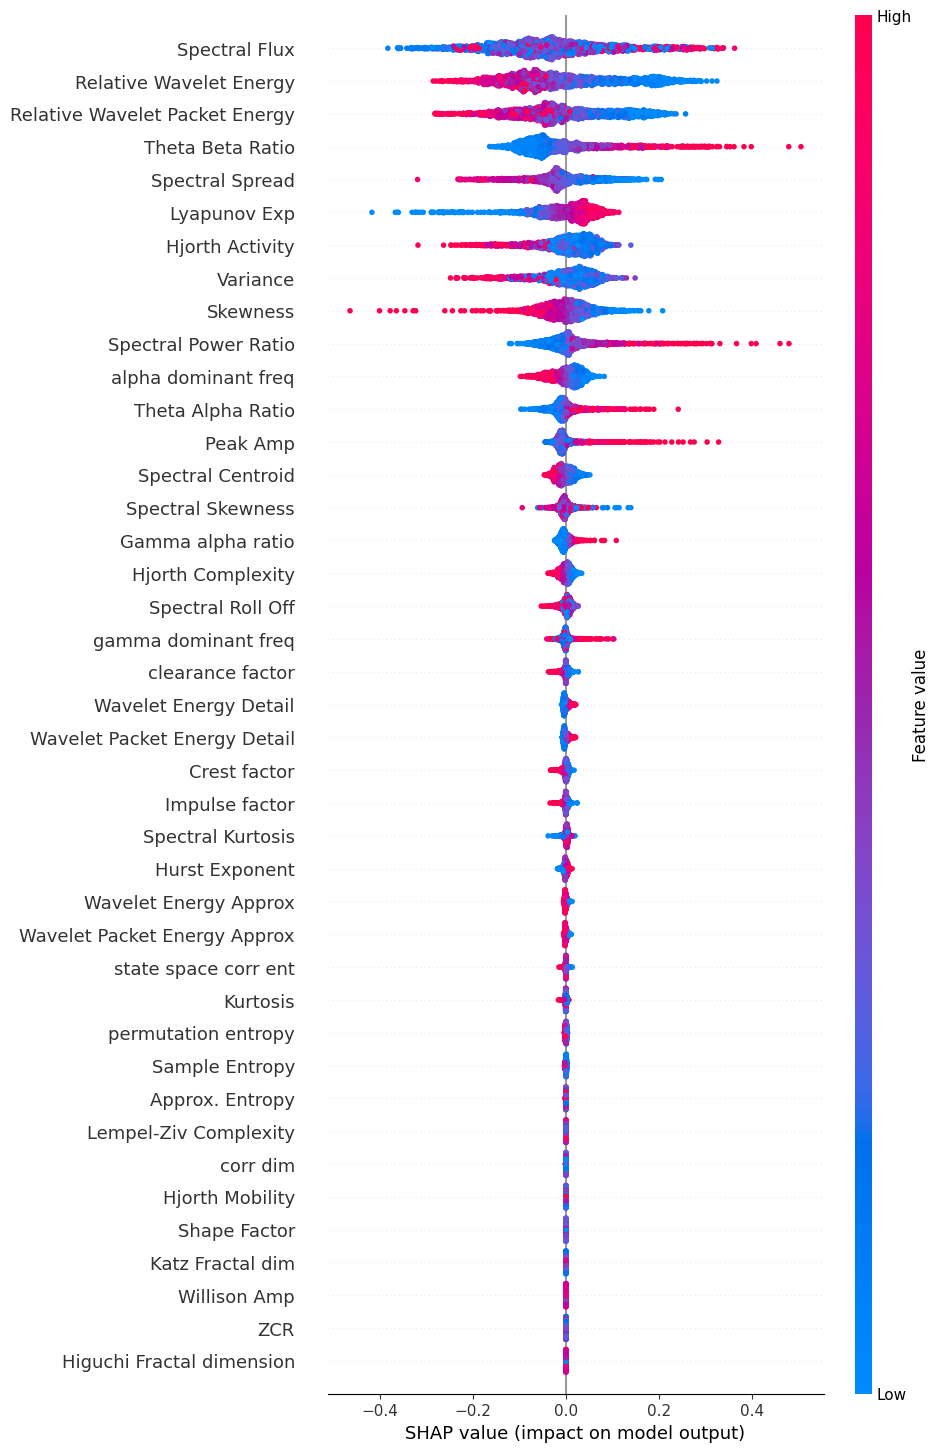

In [23]:
import shap
explainer = shap.Explainer(ensemble_model, X,feature_names=characters)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values[:,:,0], max_display=41)

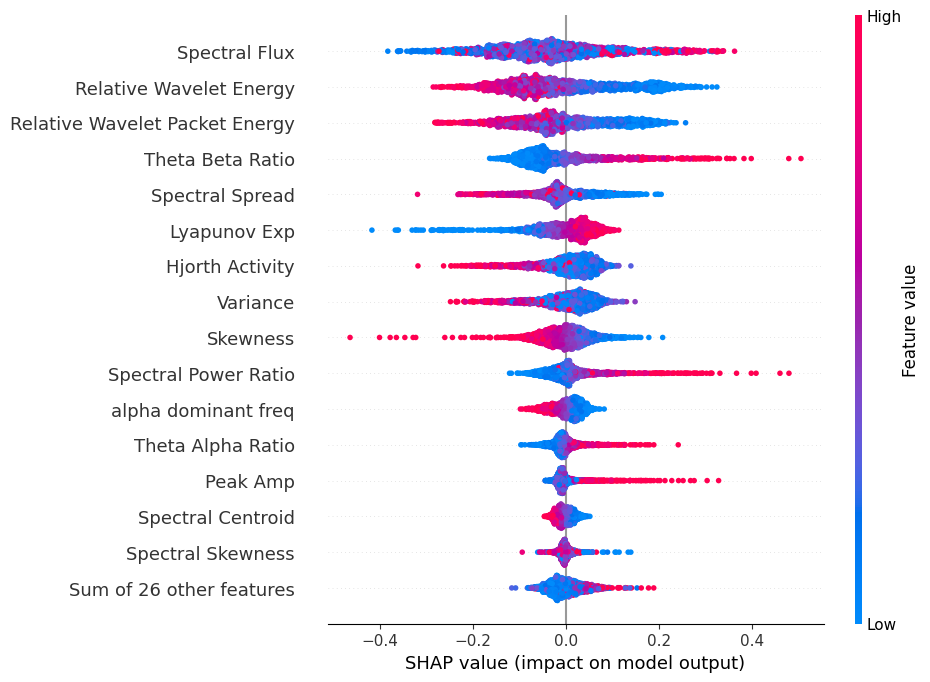

In [24]:
shap.plots.beeswarm(shap_values[:,:,0], max_display=16)

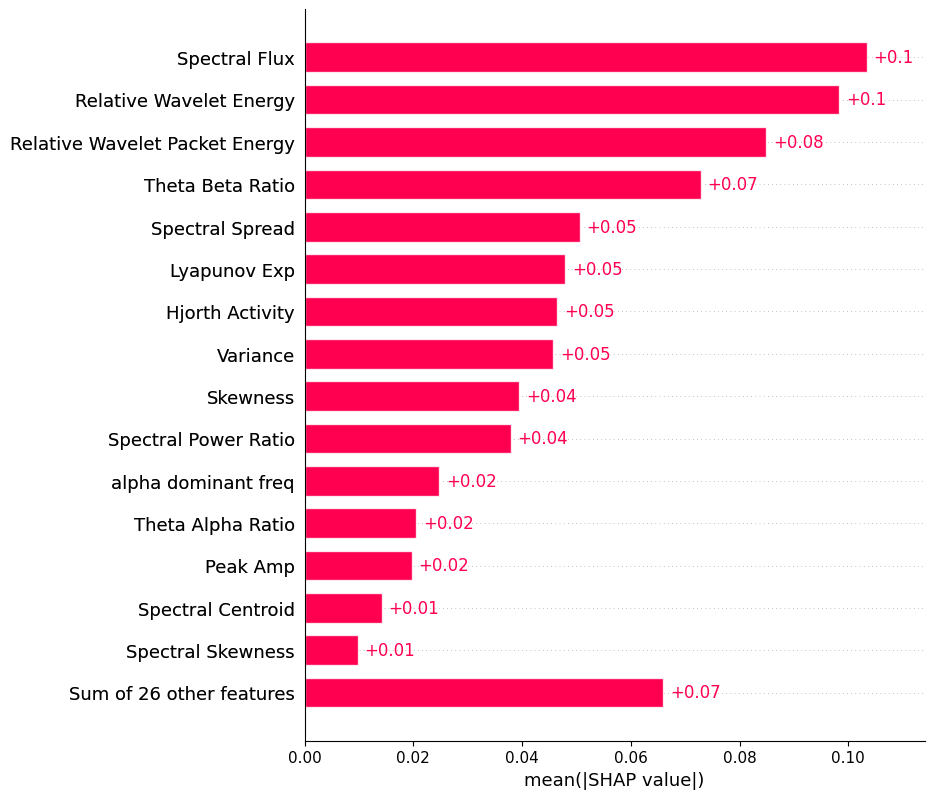

In [25]:
shap.plots.bar(shap_values[:,:,0].abs.mean(0), max_display=16)